In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is the data set add this to your drive: https://drive.google.com/drive/folders/1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim

Task 1:

In [5]:
#install pyspark
!pip install pyspark

In [57]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col, max, struct
import matplotlib.pyplot as plts

In [7]:
#creeate spark session
spark = SparkSession.builder.appName('spark_app').getOrCreate()

Task 2: Queries of Listening

In [11]:
#import the Listenings.csv file
listening_csv_path = '/content/drive/MyDrive/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema', True).option("header", True).load(listening_csv_path)

In [12]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

In [13]:
#clean the data
listening_df= listening_df.drop('date')
listening_df = listening_df.na.drop()

In [14]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [17]:
shape = (listening_df.count(), len(listening_df.columns))
shape

(13758905, 4)

In [19]:
#select track and artist
q0 = listening_df.select('artist', 'track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



In [24]:
#select all listeners who have listened to Rihana
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihana')
q1.show()

+-------+-----+------+-----+
|user_id|track|artist|album|
+-------+-----+------+-----+
+-------+-----+------+-----+



In [26]:
#2 find the top 10 users who are a fan of Rihana
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihana').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+-------+-----+
|user_id|count|
+-------+-----+
+-------+-----+



In [30]:
#find top 10 famous tracks
q3 = listening_df.select('artist', 'track').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



In [31]:
#find top 10 famous tracks of rihana
q4 = listening_df.select('artist', 'track').filter(listening_df.artist == 'Rihana').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+------+-----+-----+
|artist|track|count|
+------+-----+-----+
+------+-----+-----+



In [36]:
#find top 10 albums
q5 = listening_df.select('artist', 'album').groupby('artist', 'album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



Task 3: Queries of Genre

In [37]:
#import genre.csv
genre_csv_path = '/content/drive/MyDrive/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema', True).option("header", True).load(genre_csv_path)

In [38]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [39]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [41]:
#Inner join both sets
data = listening_df.join(genre_df, how = 'inner', on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

In [45]:
#Top 10 users who are fan of pop music
q6 = data.select('user_id').filter(data.genre =='pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



In [47]:
#find top 10 famous genres
q7 = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



In [55]:
#user favorite genre
q8_1 = data.select('user_id','genre').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('user_id'))
q8_1.show()

+-------------+-----+
|      user_id|count|
+-------------+-----+
|      zzzzita|  214|
|zzzombiebones|  271|
|     zzzchand|  159|
|      zzzBird|  185|
|        zzuuu|  166|
|    zzirCrizz|  204|
|       zzigis|  282|
|         zyxu|  203|
|       zynebz|  176|
|    zygonsftw|  242|
|   zwerin1234|  214|
|       zuzzol|  266|
|       zuzu80|  188|
|       zuzika|  190|
|     zutojkyl|  188|
|   zunkedzotz|  436|
|         zune|  622|
|    zumberman|  279|
|       zuiopo|  262|
|        zuffs|  115|
+-------------+-----+
only showing top 20 rows



In [65]:
# Group by user_id and genre and count the occurrences
user_genre_counts = data.groupby('user_id', 'genre').agg(count('*').alias('count'))

# Group by user_id and find the genre with the maximum count
q8 = user_genre_counts.groupby('user_id').agg(max(struct(col('count'), col('genre'))).alias('max_genre_info'))

# Select the user_id, favorite genre, and its count
q8 = q8.select('user_id', col('max_genre_info.genre').alias('favorite_genre'), col('max_genre_info.count').alias('listen_count'))

# Show the result
q8.show()

+---------------+--------------+------------+
|        user_id|favorite_genre|listen_count|
+---------------+--------------+------------+
|      --Shinn--|          rock|         112|
|       --ollz--|          rock|          47|
|     -Amnesiac-|         metal|         323|
|         -Bish-|          rock|          59|
|        -Danni-|          rock|          45|
|          -DeWp|       hip hop|          82|
|      -Faction-|          rock|          56|
|-February-Star-|          rock|          74|
|        -Gemma-|   british pop|          38|
|   -Gingergirl-|           pop|          28|
|        -Hazel-|      synthpop|          14|
|        -Heiko-|    electronic|          43|
|         -Katie|         lo-fi|          58|
|      -Krystal-|          rock|          87|
|         -Mark-|    indie rock|          37|
|       -Mullet-|     metalcore|          60|
|          -Robs|          rock|          38|
| -SleepingStar-|   black metal|          57|
|      -Stifler-|          rock|  

In [68]:
q9 = genre_df.select("genre").filter((col('genre')== 'pop') | (col('genre') == 'rock') |(col('genre') == 'hip hop') | (col('genre')=='metal')).groupby('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [70]:
q9_list = q9.collect()

In [71]:
labels = [row['genre'] for row in q9_list]
counts= [row['genre'] for row in q9_list]

In [73]:
print( labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
['pop', 'hip hop', 'metal', 'rock']


<BarContainer object of 4 artists>

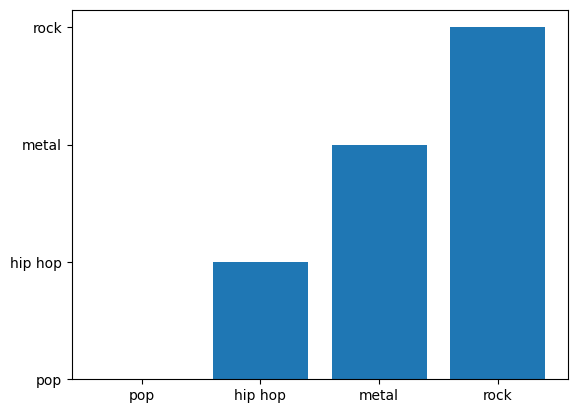

In [75]:
plts.bar(labels,counts)